# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bagas Aqmal Febrianto
- **Email:** bagasaqmal70@gmail.com
- **ID Dicoding:** bagas282

## Menentukan Pertanyaan Bisnis

- Apakah ada musim tertentu di mana jumlah penyewaan sepeda lebih tinggi atau lebih rendah?
- Berapa rata-rata waktu sewa untuk setiap musim?
- Di jam berapa penyewaan padat baik untuk hari kerja maupun hari libur?
- Bagaimana perkembangan penyewaan sepeda setiap bulannya?
- Apakah cuaca mempengaruhi penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
day_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir Dicoding/DICODING_ANALISIS DATA/Tugas Akhir/Bike-Sharing-Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir Dicoding/DICODING_ANALISIS DATA/Tugas Akhir/Bike-Sharing-Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Keterangan Dataset**

  - instant: indeks catatan
	- dteday : tanggal
	- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
	- yr : tahun (0: 2011, 1: 2012)
	- bulan : bulan (1 sampai 12)
	- hr : jam (0 hingga 23)
	- holiday : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
	- hari kerja : hari dalam seminggu
	- hari kerja : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
	+ cuaca :
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
	- temp: Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
	- atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
	- hum: Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
	- windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
	- casual: jumlah pengguna biasa
	- terdaftar: jumlah pengguna terdaftar
	- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar

Translated with DeepL.com (free version)

**Insight:**
- xxx
- xxx

### Assessing Data

**Dataset Day**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan dalam type data, yakni pada kolom dteday yang seharusnya datetime bukan Object

**Meriksa nilai unik pada kolom tertentu**

In [8]:
day_df.groupby(by='holiday').instant.nunique()

,instant
holiday,
0,710
1,21


In [9]:
day_df.groupby(by='weekday').instant.nunique()

,instant
weekday,
0,105
1,105
2,104
3,104
4,104
5,104
6,105


In [10]:
day_df.groupby(by='workingday').instant.nunique()

,instant
workingday,
0,231
1,500


**Memeriksa kolom yang bernilai null atau kosong**

In [11]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Setelah dilakukan pengecekan tampak bahwa data tidak memiliki nilai kosong

**Memeriksa data duplikat pada dataset day_df**

In [12]:
day_df.duplicated().sum()

0

Tampak bahwa tidak terdapat data yang duplikat

**Melihat statistik pada dataset**



In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari analisis diatas dapat kita simpulkan bahwa:


1.   Tidak ditemukannya keanehan dalam dataset
2.   peminjam secara casual paling sedikit adalah 2 dan yang terdaftar terdapat 20.

3.   Peminjam secara casual paling banyak adalah 3410 dan yang terdaftar 6946



**Dataset hour**

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
hour_df.duplicated().sum()

0

In [16]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Cleaning Data

**Konversi to Datetime**

Dataset day

In [17]:
datetime_columns = ['dteday']
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dataset hour

In [19]:
datetime_columns = ['dteday']
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Menghapus kolom yang tidak berguna atau sudah mewakili**

Dataset Day

In [21]:
col_drop = ['temp','atemp','hum','windspeed']

day_df = day_df.drop(col_drop, axis=1)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Dataset Hour

In [22]:
col_drop = ['temp','atemp','hum','windspeed']

hour_df = hour_df.drop(col_drop, axis=1)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


Alasan penghapusan dilakukan karena kolom tersebut sudah diwakili oleh setiap kolom musim

**Mengubah Nilai Pada Dataset**

Dataset Day

In [23]:
# Membuat peta untuk mengubah nilai season menjadi nama musim
season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
# Membuat peta untuk mengubah nilai weekday menjadi nama hari dalam bahasa Inggris
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
cuaca_mapping = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain with Thunderstorms',
    4: 'Heavy Rain, Ice Pellets, or Snow'
}

year_mapping = {
    0: "2011",
    1: "2012"
}

bulan_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Mengubah kolom 'season', 'weekday', dan 'weathersit' menjadi tipe data object
day_df['season'] = day_df['season'].astype('object')
day_df['weekday'] = day_df['weekday'].astype('object')
day_df['weathersit'] = day_df['weathersit'].astype('object')
day_df['yr'] = day_df['yr'].astype('object')
day_df['mnth'] = day_df['mnth'].astype('object')

# Mengubah nilai di kolom 'season' berdasarkan peta yang telah dibuat
day_df['season'] = day_df['season'].map(season_mapping)
# Mengubah nilai di kolom 'weekday' berdasarkan peta yang telah dibuat
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)
# Mengubah nilai di kolom 'cuaca' berdasarkan peta yang telah dibuat
day_df['weathersit'] = day_df['weathersit'].map(cuaca_mapping)
day_df['yr'] = day_df['yr'].map(year_mapping)
day_df['mnth'] = day_df['mnth'].map(bulan_mapping)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,January,0,Saturday,0,Mist or Cloudy,331,654,985
1,2,2011-01-02,Musim Semi,2011,January,0,Sunday,0,Mist or Cloudy,131,670,801
2,3,2011-01-03,Musim Semi,2011,January,0,Monday,1,Clear or Partly Cloudy,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,January,0,Tuesday,1,Clear or Partly Cloudy,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,January,0,Wednesday,1,Clear or Partly Cloudy,82,1518,1600


Mengubah nilai pada setiap kolom untuk mempermudah proses analisis

Dataset Hour

In [24]:
# Membuat peta untuk mengubah nilai season menjadi nama musim
season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
# Membuat peta untuk mengubah nilai weekday menjadi nama hari dalam bahasa Inggris
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
cuaca_mapping = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain with Thunderstorms',
    4: 'Heavy Rain, Ice Pellets, or Snow'
}

year_mapping = {
    0: "2011",
    1: "2012"
}

bulan_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Mengubah kolom 'season', 'weekday', dan 'weathersit' menjadi tipe data object
hour_df['season'] = hour_df['season'].astype('object')
hour_df['weekday'] = hour_df['weekday'].astype('object')
hour_df['weathersit'] = hour_df['weathersit'].astype('object')
hour_df['yr'] = hour_df['yr'].astype('object')
hour_df['mnth'] = hour_df['mnth'].astype('object')

# Mengubah nilai di kolom 'season' berdasarkan peta yang telah dibuat
hour_df['season'] = hour_df['season'].map(season_mapping)
# Mengubah nilai di kolom 'weekday' berdasarkan peta yang telah dibuat
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)
# Mengubah nilai di kolom 'cuaca' berdasarkan peta yang telah dibuat
hour_df['weathersit'] = hour_df['weathersit'].map(cuaca_mapping)
hour_df['yr'] = hour_df['yr'].map(year_mapping)
hour_df['mnth'] = hour_df['mnth'].map(bulan_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,January,0,0,Saturday,0,Clear or Partly Cloudy,3,13,16
1,2,2011-01-01,Musim Semi,2011,January,1,0,Saturday,0,Clear or Partly Cloudy,8,32,40
2,3,2011-01-01,Musim Semi,2011,January,2,0,Saturday,0,Clear or Partly Cloudy,5,27,32
3,4,2011-01-01,Musim Semi,2011,January,3,0,Saturday,0,Clear or Partly Cloudy,3,10,13
4,5,2011-01-01,Musim Semi,2011,January,4,0,Saturday,0,Clear or Partly Cloudy,0,1,1


**Ubah nama kolom**

Dataset Day

In [25]:
day_df = day_df.rename(columns={
    'dteday':'date',
    'yr': 'year',
    'mnth':'month',
    'cnt':'total_count'
})

Dataset Hour

In [26]:
hour_df = hour_df.rename(columns={
    'dteday':'date',
    'yr': 'year',
    'hr': 'hour',
    'mnth':'month',
    'cnt':'total_count'
})

## Exploratory Data Analysis (EDA)

### Explore Data Hour

**Jumlah pengguna biasa dan terdaftar Berdasarkan tahun dan bulan**

In [27]:
day_df.groupby(by=['year', 'month']).agg({
    # 'instant': 'nunique',
    'casual':['sum','min','max','mean'],
    'registered':['sum','min','max','mean'],
}).sort_values(by='year',ascending=False)

casual                         registered              \
                  sum  min   max         mean        sum   min   max   
year month                                                             
2012 April      38456  120  3252  1281.866667     135768   907  5950   
     August     43197  935  2827  1393.451613     171306  3341  6541   
     October    34538    2  3031  1114.129032     164303    20  6911   
     November   21009  123  2290   700.300000     131655  1470  5520   
     May        44235  342  3410  1426.935484     151630  2501  6433   
     March      31618  203  3155  1019.935484     133257  2339  5893   
     June       43294  477  2963  1443.133333     159536  3594  6456   
     July       41705  747  2562  1345.322581     161902  3195  6790   
     January     8969   67  1070   289.322581      87775  1234  4185   
     February    8721   65  1435   300.724138      94416  1456  4546   
     December   13245    9  1153   427.258065     110468   432  6055   
     September  43778  371  3160  1459.266667     174795  3197  6946   
2011 August     28842  226  1914   930.387097     107849   889  4614   
     September  26545  118  2521   884.833333     100873  1689  4372   
     October    25222   57  2397   813.612903      98289   570  4267   
     November   15594   69  1275   519.800000      86573   935  3891   
     May        31050  255  2355  1001.612903     104771  2213  4238   
     March      12826   46  1424   413.741935      51219   491  2355   
     June       30612  513  1920  1020.400000     112900  2993  4488   
     July       36452  562  3065  1175.870968     104889  2298  4220   
     January     3073    9   331    99.129032      35116   416  1844   
     February    6242   47   694   222.928571      41973   905  2348   
     December    8448   50   706   272.516129      78875   451  3672   
     April      22346  121  1965   744.866667      72524   674  3722   

                             
                       mean  
year month                   
2012 April      4525.600000  
     August     5526.000000  
     October    5300.096774  
     November   4388.500000  
     May        4891.290323  
     March      4298.612903  
     June       5317.866667  
     July       5222.645161  
     January    2831.451613  
     February   3255.724138  
     December   3563.483871  
     September  5826.500000  
2011 August     3479.000000  
     September  3362.433333  
     October    3170.612903  
     November   2885.766667  
     May        3379.709677  
     March      1652.225806  
     June       3763.333333  
     July       3383.516129  
     January    1132.774194  
     February   1499.035714  
     December   2544.354839  
     April      2417.466667

Berdasarkan hasil analisa diatas didapatkan bahwa:


1.   Peminjam pada tahun 2011 untuk kategori peminjam kasual dan peminjam terdaftar, keduanya paling banyak berada di bulan **September**
2.   Peminjam pada tahun 2012 untuk kategori peminjam kasual dan peminjam terdaftar, keduanya paling banyak berada di bulan **Juli**



**Total sepeda sewaan Berdasarkan tahun dan bulan**

In [28]:
day_df.groupby(by=['year', 'month']).agg({
        'total_count':['sum','min','max','mean']
}).sort_values(by='year',ascending=False)

total_count                         
                       sum   min   max         mean
year month                                         
2012 April          174224  1027  7460  5807.466667
     August         214503  4549  7865  6919.451613
     October        198841    22  8156  6414.225806
     November       152664  2277  6852  5088.800000
     May            195865  2843  8294  6318.225806
     March          164875  3194  8362  5318.548387
     June           202830  4127  8120  6761.000000
     July           203607  4459  8173  6567.967742
     January         96744  1301  4521  3120.774194
     February       103137  1529  5062  3556.448276
     December       123713   441  6606  3990.741935
     September      218573  4073  8714  7285.766667
2011 August         136691  1115  5895  4409.387097
     September      127418  1842  5423  4247.266667
     October        123511   627  5511  3984.225806
     November       102167  1495  4486  3405.566667
     May            135821  2633  5805  4381.322581
     March           64045   605  3239  2065.967742
     June           143512  3767  5515  4783.733333
     July           141341  3285  6043  4559.387097
     January         38189   431  1985  1231.903226
     February        48215  1005  2927  1721.964286
     December        87323   705  3940  2816.870968
     April           94870   795  5312  3162.333333

Berdasarkan hasil analisa diatas didapatkan bahwa:


1.   Peminjam pada tahun 2011 untuk bulan dengan peminjam terendah berada di bulan **Oktober**, dan peminjaman tertinggi berada di bulan **September**
2.    Peminjam pada tahun 2012 untuk bulan dengan peminjam terendah berada di bulan **Januari**, dan peminjaman tertinggi berada di bulan **Juli**



**Jumlah pengguna terdaftar maupun tidak terdaftar Berdasarkan tahun dan hari dalam seminggu**


In [29]:
day_df.groupby(by=['year','weekday']).agg({
    'casual':['sum','min','max','mean'],
    'registered':['sum','min','max','mean'],
}).sort_values(by='year',ascending=False)

casual                         registered              \
                  sum  min   max         mean        sum   min   max   
year weekday                                                           
2012 Friday     48785  115  2469   938.173077     256999  2307  6917   
     Monday     39224    2  2557   740.075472     236058    20  6435   
     Saturday   94305   67  3410  1813.557692     203759  1182  5966   
     Sunday     80918   73  3283  1526.754717     186035   907  5657   
     Thursday   39020   74  1405   750.384615     271823  1470  6781   
     Tuesday    33854   87  1348   651.038462     254917   573  6697   
     Wednesday  36659    9  2562   704.980769     267220   432  6946   
2011 Friday     29453   38  1318   566.403846     152553  1129  4414   
     Monday     31560   41  3065   606.923077     148661   883  4157   
     Saturday   59547   57  2418  1123.528302     120196   570  3647   
     Sunday     59603   54  2521  1146.211538     117471   451  3466   
     Thursday   22440   15  1027   431.538462     152112   416  4488   
     Tuesday    23989    9  1281   461.326923     156349   674  4614   
     Wednesday  20660   25   949   397.307692     148509   472  4411   

                             
                       mean  
year weekday                 
2012 Friday     4942.288462  
     Monday     4453.924528  
     Saturday   3918.442308  
     Sunday     3510.094340  
     Thursday   5227.365385  
     Tuesday    4902.250000  
     Wednesday  5138.846154  
2011 Friday     2933.711538  
     Monday     2858.865385  
     Saturday   2267.849057  
     Sunday     2259.057692  
     Thursday   2925.230769  
     Tuesday    3006.711538  
     Wednesday  2855.942308

Berdasarkan analisis diatas didapatkan bahwa:


1.   Pada tahun 2011 dan 2012, peminjam kategori casual banyak melakukan peminjaman di hari **Sabtu**, dan peminjam dengan kategori terdaftar paling banyak melakukan peminjaman di hari **Kamis**



**Total penyewa dalam perhari berdasarkan tahun dan hari dalam seminggu**

In [30]:
day_df.groupby(by=['year','weekday']).agg({
    'total_count': ['sum','min','max','mean']
}).sort_values(by='year',ascending=False)

total_count                         
                       sum   min   max         mean
year weekday                                       
2012 Friday         305784  3095  8362  5880.461538
     Monday         275282    22  7525  5194.000000
     Saturday       298064  1301  8714  5732.000000
     Sunday         266953  1027  8227  5036.849057
     Thursday       310843  2114  7804  5977.750000
     Tuesday        288771  1013  7767  5553.288462
     Wednesday      303879   441  8173  5843.826923
2011 Friday         182006  1167  5538  3500.115385
     Monday         180221  1000  6043  3465.788462
     Saturday       179743   627  5923  3391.377358
     Sunday         177074   605  5511  3405.269231
     Thursday       174552   431  5515  3356.769231
     Tuesday        180338   683  5895  3468.038462
     Wednesday      169169   506  5225  3253.250000

Berdasarkan hasiil analisis diatas dapat disimpulkan bahwa:


1.   Pada tahun 2011, hari teramai dilakukannya peminjaman berada di hari **Kamis**, dan hari yang paling sedikit penyewaan berada di hari **minggu**
2.   Pada tahun 2011, hari teramai dilakukannya peminjaman berada di hari **Jumat**, dan hari yang paling sedikit penyewaan berada di hari **Kamis**



**Jumlah pendaftar untuk setiap season di tahun 2011 dan 2012**

In [31]:
day_df.groupby(by=['year','season']).agg({
    'registered':['sum','min','max','mean']
}).sort_values(by='year',ascending=False)

registered                         
                         sum   min   max         mean
year season                                          
2012 Musim Dingin     438507    20  6946  4927.044944
     Musim Gugur      510838  3195  6917  5434.446809
     Musim Panas      445315   907  6456  4840.380435
     Musim Semi       282151   432  5315  3100.560440
2011 Musim Dingin     273324   570  4372  3071.056180
     Musim Gugur      324200   889  4614  3448.936170
     Musim Panas      269752   674  4414  2932.086957
     Musim Semi       128575   416  2841  1428.611111

Berdasarkan analisis daitas didapatkan bahwa muusim yang paling banyak dilakukan penyewaan sepeda untuk kategori registered adalah **Musim Gugur**, hal ini berlaku untuk dikedua tahunnya

**Jumlah season dengan pendaftar teramai keseluruhan**

In [32]:
day_df.groupby(by='season').agg({
    'registered':['sum','min','max','mean']
}).sort_values(by=('registered','mean'),ascending=False)

registered                        
                    sum  min   max         mean
season                                         
Musim Gugur      835038  889  6917  4441.691489
Musim Dingin     711831   20  6946  3999.050562
Musim Panas      715067  674  6456  3886.233696
Musim Semi       410726  416  5315  2269.204420



*   Musim gugur memiliki total pendaftaran pengguna tertinggi sebesar 835,038. Ini menunjukkan bahwa musim ini mungkin lebih disukai oleh pengguna atau ada kondisi yang membuat banyak orang mendaftar di periode ini.
*   meskipun musim gugur memiliki pendaftaran total dan rata-rata tertinggi, pendaftaran maksimal dalam satu periode ditemukan pada musim dingin dengan jumlah 6,946 pengguna.



**Jumlah pengguna yang terdaftar maupun tidak terdaftar dalam berbagai cuaca berdasarkan tahun**

In [33]:
day_df.groupby(by=['year','weathersit']).agg({
    'casual':['sum','min','max','mean'],
    'registered':['sum','min','max','mean'],
})

casual                         \
                                               sum min   max         mean   
year weathersit                                                             
2011 Clear or Partly Cloudy                 177272  15  2521   784.389381   
     Light Snow or Rain with Thunderstorms    1993  34   254   132.866667   
     Mist or Cloudy                          67987   9  3065   548.282258   
2012 Clear or Partly Cloudy                 269074  73  3410  1135.333333   
     Light Snow or Rain with Thunderstorms    1902   2  1264   317.000000   
     Mist or Cloudy                         101789  65  3155   827.552846   

                                           registered                           
                                                  sum   min   max         mean  
year weathersit                                                                 
2011 Clear or Partly Cloudy                    657795   416  4614  2910.597345  
     Light Snow or Rain with Thunderstorms      23119   472  2545  1541.266667  
     Mist or Cloudy                            314937   491  4240  2539.814516  
2012 Clear or Partly Cloudy                   1153811  1379  6946  4868.400844  
     Light Snow or Rain with Thunderstorms      10855    20  4324  1809.166667  
     Mist or Cloudy                            512145   573  6844  4163.780488



1.   Pada kedua tahun (2011 dan 2012), jumlah pengguna registered (terdaftar) sangat mendominasi dibandingkan pengguna casual (tidak terdaftar) di semua kondisi cuaca.
Misalnya, pada cuaca "Clear o
2.   Pada kondisi cuaca yang lebih baik, yaitu "Clear or Partly Cloudy," terdapat peningkatan signifikan dalam penggunaan untuk kedua tipe pengguna (baik casual maupun registered).



**Total penyewa dalam berbagai cuaca berdasarkan tahunnya**

In [34]:
day_df.groupby(by=['year','weathersit']).agg({
    'total_count':['sum','min','max','mean']
})

total_count              \
                                                   sum   min   max   
year weathersit                                                      
2011 Clear or Partly Cloudy                     835067   431  5923   
     Light Snow or Rain with Thunderstorms       25112   506  2765   
     Mist or Cloudy                             382924   605  6043   
2012 Clear or Partly Cloudy                    1422885  1529  8714   
     Light Snow or Rain with Thunderstorms       12757    22  4639   
     Mist or Cloudy                             613934   920  8362   

                                                         
                                                   mean  
year weathersit                                          
2011 Clear or Partly Cloudy                 3694.986726  
     Light Snow or Rain with Thunderstorms  1674.133333  
     Mist or Cloudy                         3088.096774  
2012 Clear or Partly Cloudy                 6003.734177  
     Light Snow or Rain with Thunderstorms  2126.166667  
     Mist or Cloudy                         4991.333333



*   Pada kedua tahun (2011 dan 2012), kondisi cuaca yang cerah atau sebagian berawan ("Clear or Partly Cloudy") memiliki jumlah penggunaan tertinggi dibandingkan dengan kondisi cuaca lainnya.
*   Rata-rata penggunaan juga meningkat drastis pada kondisi cuaca berkabut atau berawan ("Mist or Cloudy"), dari 3,088 di tahun 2011 menjadi 4,991 di tahun 2012.



### Explore Data Hour

In [35]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,casual,registered,total_count
0,1,2011-01-01,Musim Semi,2011,January,0,0,Saturday,0,Clear or Partly Cloudy,3,13,16
1,2,2011-01-01,Musim Semi,2011,January,1,0,Saturday,0,Clear or Partly Cloudy,8,32,40
2,3,2011-01-01,Musim Semi,2011,January,2,0,Saturday,0,Clear or Partly Cloudy,5,27,32
3,4,2011-01-01,Musim Semi,2011,January,3,0,Saturday,0,Clear or Partly Cloudy,3,10,13
4,5,2011-01-01,Musim Semi,2011,January,4,0,Saturday,0,Clear or Partly Cloudy,0,1,1


**Jumlah pengguna biasa dan terdaftar untuk setiap jamnya**

In [36]:
# Mengelompokkan data berdasarkan 'year' dan 'hour' kemudian menghitung agregasi
grouped_hour = hour_df.groupby(by=['year', 'hour']).agg({
    'casual': ['sum', 'min', 'max', 'mean'],
    'registered': ['sum', 'min', 'max', 'mean']
})

# Mengambil 5 teratas untuk setiap tahun berdasarkan 'registered_mean'
top5_per_year = grouped_hour.groupby('year').apply(lambda x: x.nlargest(5, ('registered', 'mean')))

# Menghilangkan tambahan level index yang dihasilkan oleh apply
top5_per_year = top5_per_year.reset_index(level=0, drop=True)

# Menampilkan hasil
top5_per_year

casual                     registered                     
             sum min  max       mean        sum min  max        mean
year hour                                                           
2011 17    21473   0  240  58.830137     106159  14  567  290.846575
     18    18066   0  222  49.768595      98919  23  537  272.504132
     8      6969   0   68  19.198347      88498   4  514  243.796143
     19    14525   0  178  40.013774      71277  11  397  196.355372
     16    20739   0  236  56.819178      64883   8  356  177.761644
2012 17    32747   2  347  89.717808     176481  19  885  483.509589
     18    26430   1  266  72.410959     166357  20  886  455.772603
     8      8792   0   69  24.153846     156742  10  808  430.609890
     19    20980   0  230  57.479452     120007  14  662  328.786301
     16    33095   0  367  90.671233     109031  13  481  298.715068



*   Pada kedua tahun (2011 dan 2012), jam sibuk bagi pengguna terdaftar (registered) adalah pada jam 17 dan 18. Di tahun 2012, jumlah penggunaan mencapai 176,481 di jam 17 dan 166,357 di jam 18.
*   Rata-rata pengguna terdaftar pada jam sibuk di tahun 2012 cukup tinggi, yaitu 483 pada jam 17 dan 456 pada jam 18. Hal ini menunjukkan bahwa jam tersebut adalah waktu puncak ketika banyak pengguna menggunakan layanan, kemungkinan besar karena bertepatan dengan waktu pulang kerja.



**Total penyewa teramai untuk 5 jam teratas pada hari kerja**

In [37]:
# Mengelompokkan data berdasarkan 'year' dan 'hour' kemudian menghitung agregasi
grouped_hour = hour_df[hour_df['workingday'] == 1].groupby(by=['year', 'hour']).agg({
    'total_count': ['sum', 'min', 'max', 'mean']
})

# Mengambil 5 teratas untuk setiap tahun berdasarkan 'total_count'
top5_per_year = grouped_hour.groupby('year').apply(lambda x: x.nlargest(5, ('total_count', 'mean')))

# Menghilangkan tambahan level index yang dihasilkan oleh apply
top5_per_year = top5_per_year.reset_index(level=0, drop=True)

# Menampilkan hasil
top5_per_year

total_count                     
                  sum min  max        mean
year hour                                 
2011 17         98729  26  638  394.916000
     18         91496  51  621  367.453815
     8          86677  44  564  349.504032
     19         64501  33  465  259.040161
     16         53754  21  444  215.016000
2012 17        163391  26  976  656.188755
     18        153633  26  977  617.000000
     8         149918  31  839  604.508065
     19        109003  18  743  437.763052
     16         92514  13  634  371.542169



*   Pada tahun 2011, total penggunaan pada jam 17 mencapai 98,729 dengan rata-rata penggunaan per jam sekitar 395.
*   Di tahun 2012, penggunaan meningkat signifikan pada jam yang sama, dengan total 163,391 pengguna dan rata-rata penggunaan mencapai 656, hampir dua kali lipat dibandingkan tahun sebelumnya.



**Total penyewa teramai untuk 5 jam teratas pada hari libur**

In [38]:
# Mengelompokkan data berdasarkan 'year' dan 'hour' kemudian menghitung agregasi
grouped_hour = hour_df[(hour_df['workingday'] == 0) | (hour_df['holiday'] == 1)].groupby(by=['year', 'hour']).agg({
    'total_count': ['sum', 'min', 'max', 'mean']
})

# Mengambil 5 teratas untuk setiap tahun berdasarkan 'total_count'
top5_per_year = grouped_hour.groupby('year').apply(lambda x: x.nlargest(5, ('total_count', 'mean')))

# Menghilangkan tambahan level index yang dihasilkan oleh apply
top5_per_year = top5_per_year.reset_index(level=0, drop=True)

# Menampilkan hasil
top5_per_year

total_count                     
                  sum min  max        mean
year hour                                 
2011 13         32867  30  497  285.800000
     12         32286  32  493  280.747826
     14         32277  23  500  280.669565
     15         32069   7  506  278.860870
     16         31868  11  491  277.113043
2012 13         53234  52  760  458.913793
     12         52320  48  776  451.034483
     14         51956  53  750  447.896552
     15         50817  38  750  438.077586
     16         49612  36  783  427.689655



*   Pada jam 13, total penggunaan di tahun 2011 adalah 32,867 dengan rata-rata 286 per jam, sedangkan di tahun 2012 meningkat menjadi 53,234 dengan rata-rata 459.
*   Jam 16 juga mengalami peningkatan yang signifikan dari 31,868 (rata-rata 277) di tahun 2011 menjadi 49,612 (rata-rata 428) di tahun 2012.



In [39]:
# Mengelompokkan data berdasarkan 'season' dan 'hour' kemudian menghitung agregasi
grouped_hour_season = hour_df[hour_df['workingday'] == 1].groupby(by=['season','hour']).agg({
    'total_count': ['sum','min','max','mean']
})

# Mengambil 5 teratas untuk setiap season berdasarkan 'total_count'
top_per_season_hour = grouped_hour_season.groupby('season').apply(lambda x: x.nlargest(5, ('total_count', 'mean')))

# Menghilangkan tambahan level index yang dihasilkan oleh apply
top_per_season_hour = top5_per_year.reset_index(level=0, drop=True)

# Menampilkan hasil
top_per_season_hour

total_count                     
             sum min  max        mean
hour                                 
13         32867  30  497  285.800000
12         32286  32  493  280.747826
14         32277  23  500  280.669565
15         32069   7  506  278.860870
16         31868  11  491  277.113043
13         53234  52  760  458.913793
12         52320  48  776  451.034483
14         51956  53  750  447.896552
15         50817  38  750  438.077586
16         49612  36  783  427.689655

## Visualization & Explanatory Analysis

### Bagaimana perkembangan penyewaan sepeda setiap bulannya?


<ipython-input-40-592d79985c23>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = day_df.resample(rule='M', on='date').agg({


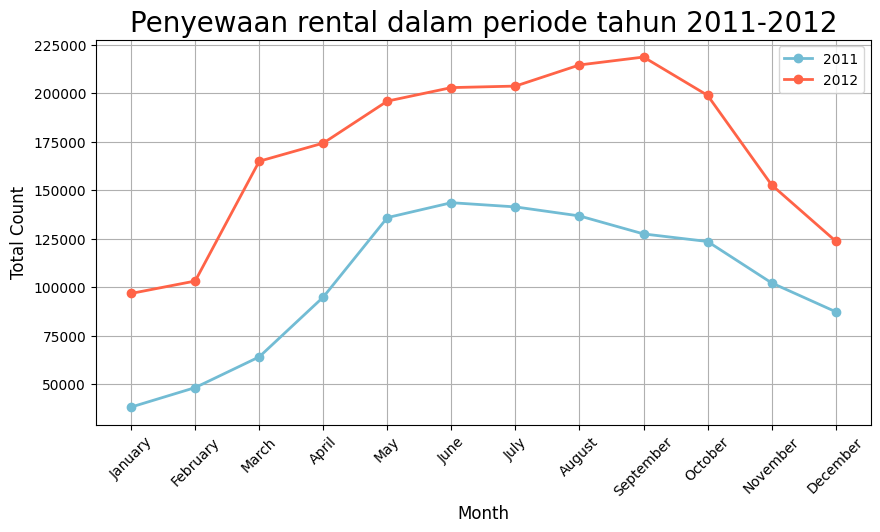

In [40]:
monthly_counts = day_df.resample(rule='M', on='date').agg({
    'total_count': 'sum'
})

# Menambahkan kolom tahun untuk pemisahan
monthly_counts['year'] = monthly_counts.index.year

# Mengubah index menjadi nama bulan
monthly_counts.index = monthly_counts.index.strftime('%B')

# Membuat plot
plt.figure(figsize=(10, 5))

# Menggambarkan garis untuk tahun 2011
plt.plot(monthly_counts[monthly_counts['year'] == 2011].index,
         monthly_counts[monthly_counts['year'] == 2011]['total_count'],
         marker='o', linewidth=2, color="#72BCD4", label='2011')

# Menggambarkan garis untuk tahun 2012
plt.plot(monthly_counts[monthly_counts['year'] == 2012].index,
         monthly_counts[monthly_counts['year'] == 2012]['total_count'],
         marker='o', linewidth=2, color="#FF6347", label='2012')

# Menambahkan elemen visual lainnya
plt.title("Penyewaan rental dalam periode tahun 2011-2012", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.grid()
plt.legend()  # Menambahkan legenda untuk membedakan tahun
plt.show()

Dari hasil visualisasi penyewaan rental untuk periode tahun 2011-2012, terlihat bahwa pada tahun 2012 terjadi peningkatan penyewaan yang signifikan dibandingkan dengan tahun sebelumnya, 2011. Di tahun 2012, terdapat lonjakan jumlah penyewaan yang konsisten dari bulan Januari hingga September. Selain itu, pola tren di kedua tahun menunjukkan kesamaan, yaitu penurunan jumlah penyewaan yang terjadi pada bulan September.

### Apakah ada musim tertentu di mana jumlah penyewaan sepeda lebih tinggi atau lebih rendah?

In [41]:
total_count_df = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()
total_count_df.head()

,season,registered,casual
0,Musim Dingin,711831,129782
1,Musim Gugur,835038,226091
2,Musim Panas,715067,203522
3,Musim Semi,410726,60622


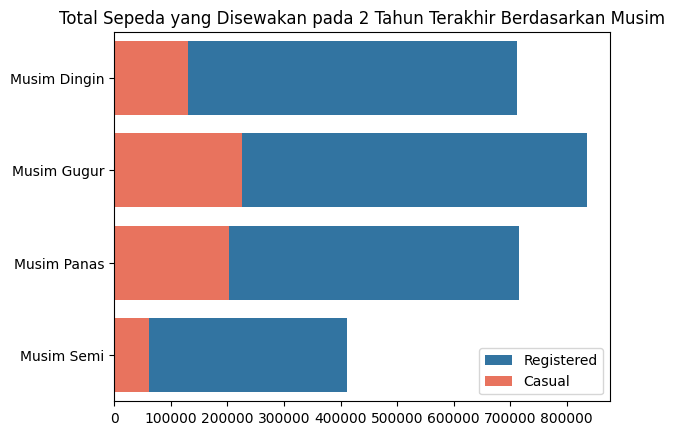

In [42]:
sns.barplot(x='registered', y='season', data=total_count_df, label='Registered', color='tab:blue')
#Casual
sns.barplot(x='casual', y='season', data=total_count_df,label='Casual', color='#FF6347')

plt.title('Total Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()



Berdasarkan visualisasi, terlihat bahwa penyewaan sepeda tertinggi terjadi di musim dingin dan gugur, didominasi oleh pengguna terdaftar (registered), yang menunjukkan konsistensi penggunaan sepeda untuk kebutuhan rutin. Sementara itu, musim semi memiliki jumlah penyewaan terendah, kemungkinan karena cuaca yang kurang mendukung. Di musim panas dan gugur, peningkatan penyewaan dari pengguna tidak terdaftar (casual) mengindikasikan tingginya minat bersepeda untuk rekreasi saat cuaca lebih bersahabat. Secara keseluruhan, pengguna terdaftar tetap menjadi kontributor utama penyewaan di semua musim.

### Berapa rata-rata waktu sewa untuk setiap musim?

In [43]:
# Mengelompokkan data berdasarkan 'hour' dan 'season', lalu menghitung total jumlah sewa
group_hour = hour_df.groupby(['hour', 'season']).agg({'total_count': 'sum'}).reset_index()

# Mengambil 3 jam teratas untuk setiap musim berdasarkan 'total_count'
top3_hours = group_hour.groupby('season', as_index=False).apply(lambda x: x.nlargest(3, 'total_count')).reset_index(drop=True)

<ipython-input-43-5bf77a60a8b1>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_hours = group_hour.groupby('season', as_index=False).apply(lambda x: x.nlargest(3, 'total_count')).reset_index(drop=True)


<ipython-input-44-93748972ffe7>:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


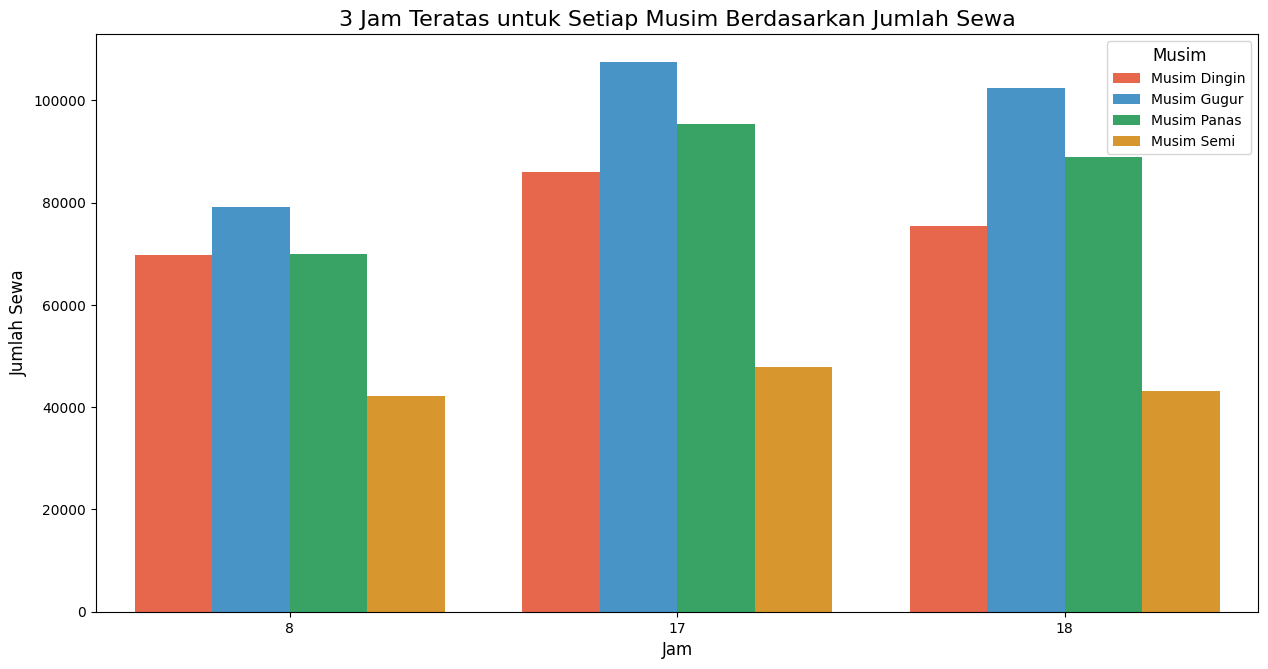

In [44]:
# Mengatur warna yang berbeda kontras
colors = ["#FF5733", "#3498DB", "#28B463", "#F39C12", "#9B59B6"]

plt.figure(figsize=(15, 7.5))

# Membuat grafik barplot
sns.barplot(
    data=top3_hours,
    x='hour',
    y='total_count',
    palette=colors,
    hue='season'
)

# Menambahkan judul dan pengaturan label
plt.title("3 Jam Teratas untuk Setiap Musim Berdasarkan Jumlah Sewa", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Sewa", fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Menampilkan legenda dan menampilkan grafik
plt.legend(title='Musim', fontsize=10, title_fontsize=12)
plt.show()

Berdasarkan hasil visualisasi dapat kita simpulkan bahwa penyewaan sepeda paling padat berada di jam 17.00 untuk setiap musim. DImana pencapaian penyewaan tertinggi berada di musim gugur.

In [45]:
grouped_cuaca = day_df.groupby('weathersit').agg({
    'total_count': 'mean'
})
grouped_cuaca

,total_count
weathersit,
Clear or Partly Cloudy,4876.786177
Light Snow or Rain with Thunderstorms,1803.285714
Mist or Cloudy,4035.862348


<ipython-input-46-1828c4ec92b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-46-1828c4ec92b7>:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


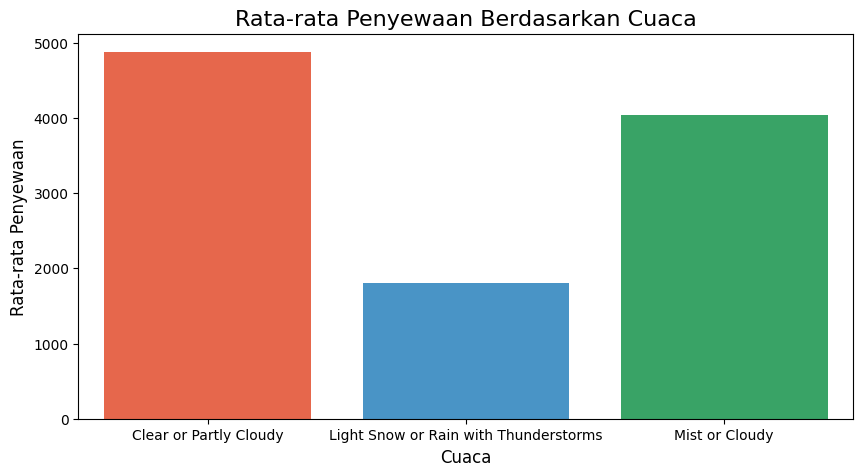

In [46]:
# Mengatur warna yang berbeda kontras
colors = ["#FF5733", "#3498DB", "#28B463", "#F39C12", "#9B59B6"]

plt.figure(figsize=(10, 5))

sns.barplot(
    data=grouped_cuaca,
    x='weathersit',
    y='total_count',
    palette=colors
)

plt.title("Rata-rata Penyewaan Berdasarkan Cuaca", fontsize=16)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Berdasarkan hasil visualisasi diatas, Rata-rata penyewaan sepeda jika dilihat dari segi cuaca menghasilkan kesimpulan bahwa cuara Clear or Partly Cloudy adalah cuaca yang paling banyak dilakukan penyewaan

### Di jam berapa penyewaan padat baik untuk hari kerja maupun hari libur?

<ipython-input-47-9b8f1ce98228>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_season_workingday = grouped_hour_working.groupby('season').apply(lambda x: x.nlargest(1, 'total_count')).reset_index(drop=True)
<ipython-input-47-9b8f1ce98228>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_season_holiday = grouped_hour_holiday.groupby('season').apply(lambda x: x.nlargest(1, 'total_count'))

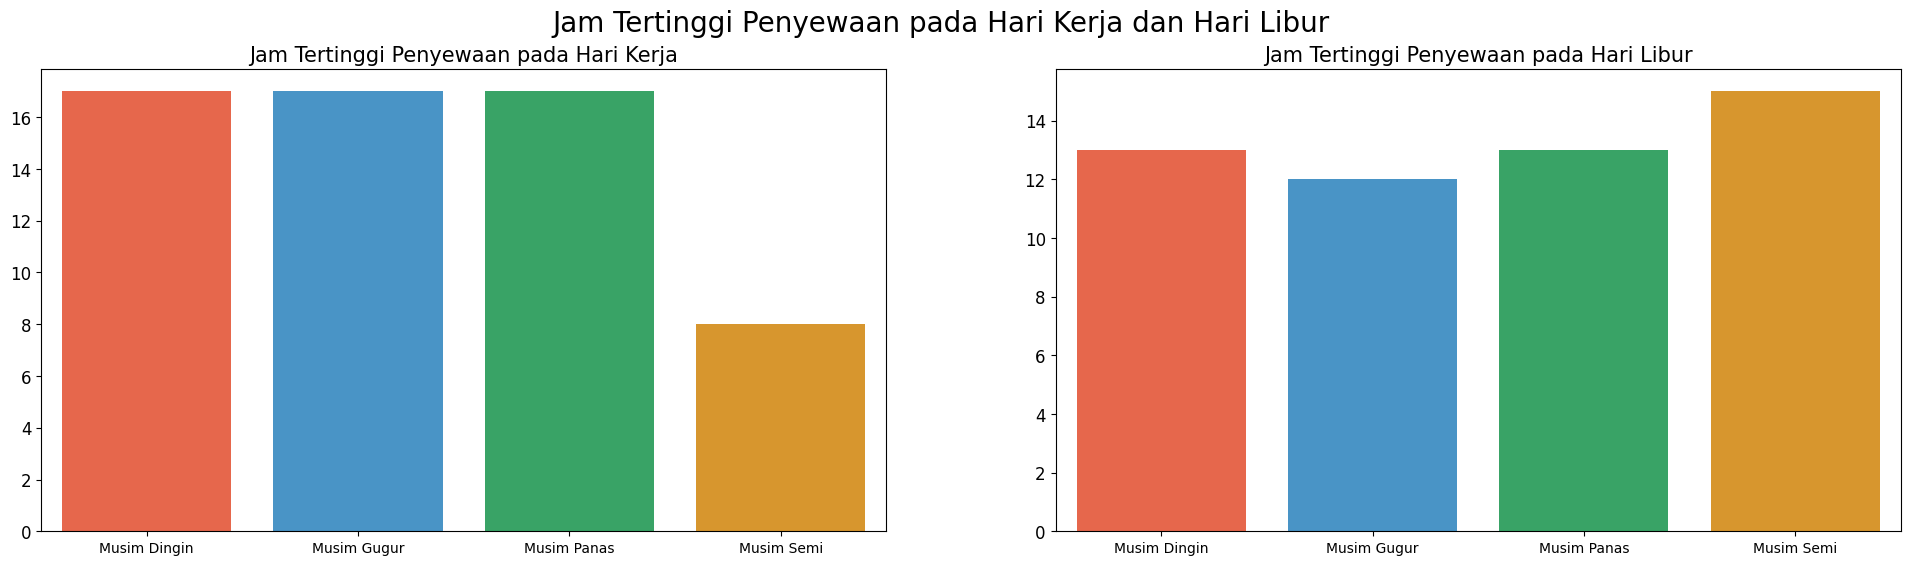

In [47]:
# Mengelompokkan data berdasarkan 'season' dan 'hour' untuk hari kerja
grouped_hour_working = hour_df[hour_df['workingday'] == 1].groupby(['season', 'hour']).agg({
    'total_count': 'mean'
}).reset_index()

# Mengambil 5 jam teratas untuk setiap musim berdasarkan 'total_count'
top5_per_season_workingday = grouped_hour_working.groupby('season').apply(lambda x: x.nlargest(1, 'total_count')).reset_index(drop=True)

# Mengelompokkan data berdasarkan 'season' dan 'hour' untuk hari libur atau hari libur nasional
grouped_hour_holiday = hour_df[(hour_df['workingday'] == 0) | (hour_df['holiday'] == 1)].groupby(['season', 'hour']).agg({
    'total_count': 'mean'
}).reset_index()

# Mengambil 5 jam teratas untuk setiap musim berdasarkan 'total_count'
top5_per_season_holiday = grouped_hour_holiday.groupby('season').apply(lambda x: x.nlargest(1, 'total_count')).reset_index(drop=True)

# Mengatur warna yang berbeda kontras
colors = ["#FF5733", "#3498DB", "#28B463", "#F39C12", "#9B59B6"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Barplot untuk hari kerja
sns.barplot(
    data=top5_per_season_workingday,
    x='season',
    y='hour',
    palette=colors,
    hue='season',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jam Tertinggi Penyewaan pada Hari Kerja", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Barplot untuk hari libur
sns.barplot(
    data=top5_per_season_holiday,
    x='season',
    y='hour',
    palette=colors,
    hue='season',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Jam Tertinggi Penyewaan pada Hari Libur", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Jam Tertinggi Penyewaan pada Hari Kerja dan Hari Libur", fontsize=20)
plt.show()


In [48]:
day_df.to_csv("day_df.csv", index=False)
hour_df.to_csv("hour_df.csv", index=False)


Visualisasi menunjukkan perbedaan jam tertinggi penyewaan sepeda pada hari kerja dan hari libur di setiap musim. Pada hari kerja, jam penyewaan tertinggi tercatat pada pukul 16-18, terutama pada musim dingin, gugur, dan panas, yang menandakan tingginya aktivitas sepulang kerja atau sekolah. Di musim semi, puncaknya lebih rendah, sekitar pukul 12-14, mungkin karena preferensi bersepeda di siang hari saat cuaca hangat. Pada hari libur, puncak penyewaan bergeser lebih awal, antara pukul 14-16 di semua musim, dengan musim semi menunjukkan penyewaan tertinggi, mengindikasikan aktivitas rekreasi yang meningkat di cuaca yang lebih baik.

## Conclusion

*   Terjadinya peningkatan penyewaan sepeda di tahun 2012.
*   Pola tren dikedua tahun menunjukan kesamaan, yaitu penurunan jumlah penyewaan yang terjadi pada bulan September.
*   Musim Panas dan Musim Gugur menunjukkan tingkat penyewaan yang tinggi baik untuk kategori casual (pengguna sementara) maupun registered (pengguna terdaftar).
*   Pada hari kerja, penyewaan tertinggi terjadi pada Musim Dingin dan Musim Gugur, dengan Musim Dingin menunjukkan angka tertinggi untuk kategori casual.
*   Pada hari libur, Musim Semi mengalami peningkatan penyewaan yang signifikan, mendekati Musim Dingin, dengan Musim Semi mencatatkan angka tertinggi di antara semua musim.
*   Penyewaan sepeda pada jam tertentu menunjukkan puncak penggunaan di jam-jam tertentu pada hari kerja dan libur, dengan tren yang sedikit lebih tinggi di hari libur terutama pada Musim Semi.


## Analisis Lanjutan (Opsional)

In [49]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,casual,registered,total_count
0,1,2011-01-01,Musim Semi,2011,January,0,Saturday,0,Mist or Cloudy,331,654,985
1,2,2011-01-02,Musim Semi,2011,January,0,Sunday,0,Mist or Cloudy,131,670,801
2,3,2011-01-03,Musim Semi,2011,January,0,Monday,1,Clear or Partly Cloudy,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,January,0,Tuesday,1,Clear or Partly Cloudy,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,January,0,Wednesday,1,Clear or Partly Cloudy,82,1518,1600


In [50]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    object        
 3   year         731 non-null    object        
 4   month        731 non-null    object        
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    object        
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    object        
 9   casual       731 non-null    int64         
 10  registered   731 non-null    int64         
 11  total_count  731 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 68.7+ KB


In [51]:
# Mengelompokkan day_df berdasarkan 'instant' untuk agregasi
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "date": "max",         # Mengambil tanggal order terakhir (recency date)
    "total_count": "sum"   # Menghitung total jumlah peminjaman (monetary)
})

# Menambahkan kolom 'frequency' dengan menghitung jumlah transaksi per 'instant'
rfm_df["frequency"] = day_df.groupby("instant")["instant"].count().values

# Mengubah nama kolom hasil agregasi
rfm_df.columns = ["instant", "recency_date", "monetary", "frequency"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["recency_date"] = pd.to_datetime(rfm_df["recency_date"]).dt.date  # Pastikan format tanggal
recent_date = day_df["date"].dt.date.max()  # Mengambil tanggal terbaru dari seluruh dataset
rfm_df["recency"] = rfm_df["recency_date"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom 'recency_date' karena tidak diperlukan lagi
rfm_df.drop("recency_date", axis=1, inplace=True)

# Menampilkan hasil
print(rfm_df.head())

   instant  monetary  frequency  recency
0        1       985          1      730
1        2       801          1      729
2        3      1349          1      728
3        4      1562          1      727
4        5      1600          1      726


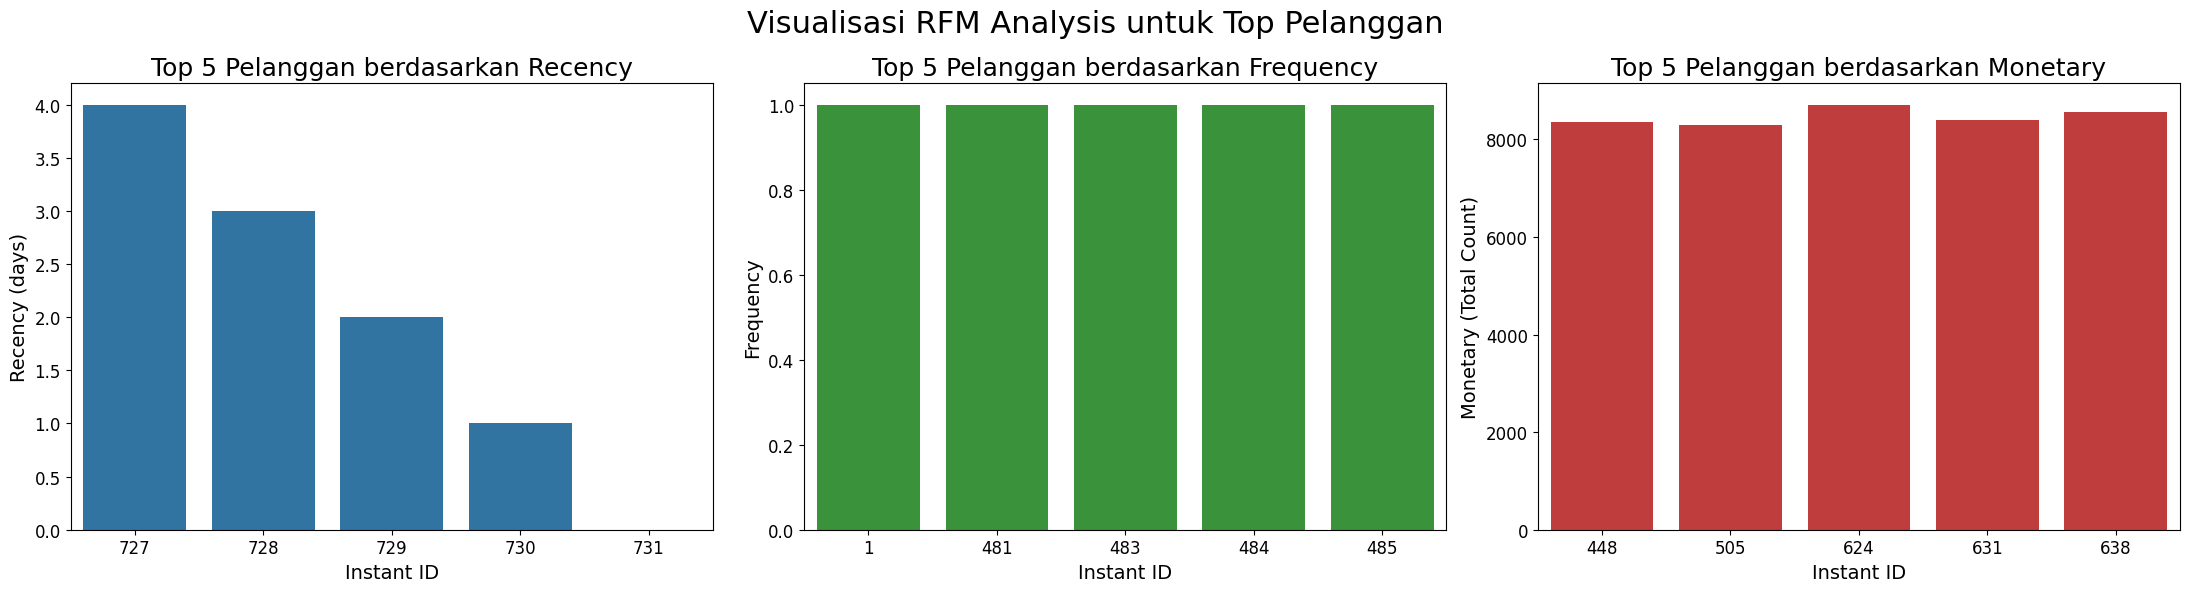

In [52]:
# Mengambil 5 data teratas berdasarkan Recency, Frequency, dan Monetary
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)

# Membuat bar plot untuk RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))

# Plot untuk Top Recency (Pelanggan dengan hari transaksi terakhir yang paling baru)
sns.barplot(
    data=top_recency,
    x="instant",
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel("Recency (days)", fontsize=14)
ax[0].set_xlabel("Instant ID", fontsize=14)
ax[0].set_title("Top 5 Pelanggan berdasarkan Recency", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# Plot untuk Top Frequency (Pelanggan dengan jumlah transaksi terbanyak)
sns.barplot(
    data=top_frequency,
    x="instant",
    y="frequency",
    color='tab:green',
    ax=ax[1]
)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_xlabel("Instant ID", fontsize=14)
ax[1].set_title("Top 5 Pelanggan berdasarkan Frequency", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

# Plot untuk Top Monetary (Pelanggan dengan total peminjaman tertinggi)
sns.barplot(
    data=top_monetary,
    x="instant",
    y="monetary",
    color='tab:red',
    ax=ax[2]
)
ax[2].set_ylabel("Monetary (Total Count)", fontsize=14)
ax[2].set_xlabel("Instant ID", fontsize=14)
ax[2].set_title("Top 5 Pelanggan berdasarkan Monetary", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle("Visualisasi RFM Analysis untuk Top Pelanggan", fontsize=22)
plt.tight_layout()
plt.show()

Pada grafik pertama, terlihat bahwa pelanggan dengan Instant ID 727 memiliki nilai recency tertinggi, menunjukkan bahwa mereka terakhir kali berinteraksi lebih baru dibandingkan pelanggan lainnya. Grafik kedua menunjukkan bahwa frekuensi interaksi antar pelanggan hampir serupa, dengan semua pelanggan memiliki tingkat frekuensi yang tinggi. Grafik ketiga mengindikasikan bahwa pelanggan dengan Instant ID 448, 506, dan 624 memiliki total nilai monetary tertinggi, yang menandakan bahwa mereka adalah pelanggan yang paling banyak berbelanja atau melakukan transaksi. Analisis ini memberikan wawasan tentang kebiasaan pelanggan dan dapat digunakan untuk strategi pemasaran atau peningkatan layanan.